In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
%matplotlib inline 
import plotly_express as px
import matplotlib.pyplot as mp
from sklearn import preprocessing

In [25]:
df = pd.read_csv(r'COOL_3500_14000_ML_covariates_2208.csv')
df = df.rename(columns={'sampling_r': 'period'})
df = df.rename(columns={'cea_name':'CEA'})
df = df.rename(columns={'property_n':'property_name'})
df = df.rename(columns={'core_number.1':'core_number'})
df = df.rename(columns={'core_120_carbon_mass':'carbon_core_120'})
df = df.rename(columns={'core_carbo':'carbon_core_120'}) # different input for NATR
df = df.rename(columns={'core_30_c':'carbon_core_30'})


df = df.drop(['Unnamed: 0','field_1','property_name','difference','CEA','strata_nam','sampling_round','core_number','actual_lat','actual_lon'], axis = 1)
df.tail()

,carbon_core_30,carbon_core_120,topsoil_Cs,subsoil_Cs,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th_k,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04
302,32.896838,106.114320,48.94765,87.11006,2985279.50,5952380.5,7324546,6734105.0,4339266.5,781724.625,6756138.5,6.77906,11.82228,11.89627,49.98874,1.00626,0.10346,0.10234,0.2029,0.0950
303,48.147591,133.859357,46.37137,90.57382,2985540.00,5952612.0,7324686,6734116.5,4339146.0,781504.625,5958782.5,6.63950,11.63178,12.25910,51.83471,1.05393,0.12047,0.10676,0.2134,0.1001
304,44.790334,155.471416,41.68763,88.78339,2983852.75,5950829.5,7323286,6733474.0,4339433.0,782644.625,6045238.5,6.93628,11.91337,11.95680,51.17888,1.00365,0.10279,0.12142,0.2007,0.0830
305,41.209194,153.688069,49.07010,94.83672,2984784.25,5951632.5,7323746,6733467.5,4338961.5,781834.625,6770582.5,6.75485,16.28521,13.08905,51.70673,0.80374,0.10469,0.08906,0.1806,0.0875
306,34.712181,95.309744,47.23005,93.47065,2984558.00,5951230.5,7323276,6733055.5,4338718.0,781824.625,6340177.5,6.67617,16.41548,12.49831,49.83781,0.76137,0.10915,0.10632,0.2068,0.0872


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carbon_core_30   307 non-null    float64
 1   carbon_core_120  307 non-null    float64
 2   topsoil_Cs       307 non-null    float64
 3   subsoil_Cs       307 non-null    float64
 4   ogc_6_corr       307 non-null    float64
 5   ogc_5_corr       307 non-null    float64
 6   ogc_4_corr       307 non-null    int64  
 7   ogc_3_corr       307 non-null    float64
 8   ogc_2_corr       307 non-null    float64
 9   ogc_1_corr       307 non-null    float64
 10  ndvi_stabl       307 non-null    float64
 11  mrvbf            307 non-null    float64
 12  gamma_th_k       307 non-null    float64
 13  gamma_th         307 non-null    float64
 14  gamma_tds        307 non-null    float64
 15  gamma_k          307 non-null    float64
 16  clay_idx         307 non-null    float64
 17  bi              

In [27]:
# get the columns we want
cols_to_norm_df = df.drop('carbon_core_120', axis = 1)
# convert to array
# transform all the data
df_array = np.array(cols_to_norm_df)
df_array

array([[2.95123389e+01, 4.76256400e+01, 5.15943100e+01, ...,
        1.06110000e-01, 1.91300000e-01, 6.26000000e-02],
       [2.65500639e+01, 4.77036400e+01, 4.57445000e+01, ...,
        1.09320000e-01, 1.68000000e-01, 7.26000000e-02],
       [3.43025911e+01, 4.21874700e+01, 4.43517900e+01, ...,
        1.30660000e-01, 2.29000000e-01, 7.60000000e-02],
       ...,
       [4.47903342e+01, 4.16876300e+01, 8.87833900e+01, ...,
        1.21420000e-01, 2.00700000e-01, 8.30000000e-02],
       [4.12091939e+01, 4.90701000e+01, 9.48367200e+01, ...,
        8.90600000e-02, 1.80600000e-01, 8.75000000e-02],
       [3.47121815e+01, 4.72300500e+01, 9.34706500e+01, ...,
        1.06320000e-01, 2.06800000e-01, 8.72000000e-02]])

In [28]:
target_df = df['carbon_core_120'].reset_index()
target_df

,index,carbon_core_120
0,0,69.448830
1,1,37.525543
2,2,79.774553
3,3,62.717927
4,4,97.171550
...,...,...
302,302,106.114320
303,303,133.859357
304,304,155.471416
305,305,153.688069


In [29]:
# df_trans = preprocessing(df_trans['slope'])
d = preprocessing.normalize(df_array, axis = 0)
scaled_df = pd.DataFrame(d , columns = cols_to_norm_df.columns).reset_index()
scaled_df
# merge with only column 1 of df
transformed_df = target_df.merge(scaled_df, on = 'index', how = 'left').drop('index', axis = 1)
transformed_df


,carbon_core_120,carbon_core_30,topsoil_Cs,subsoil_Cs,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th_k,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04
0,69.448830,0.048863,0.063487,0.047408,0.057120,0.057064,0.057041,0.057021,0.056988,0.056696,0.060237,0.026912,0.041217,0.048084,0.047549,0.036543,0.037474,0.055822,0.054103,0.040861
1,37.525543,0.043958,0.063591,0.042033,0.057142,0.057078,0.057051,0.057028,0.056989,0.056649,0.051564,0.011200,0.039816,0.047314,0.048467,0.037223,0.066375,0.057511,0.047513,0.047388
2,79.774553,0.056794,0.056238,0.040753,0.057092,0.057047,0.057029,0.057012,0.056985,0.056748,0.046159,0.032588,0.029584,0.062294,0.065925,0.065958,0.043017,0.068738,0.064765,0.049607
3,62.717927,0.046815,0.056435,0.036002,0.057086,0.057044,0.057027,0.057012,0.056986,0.056764,0.062049,0.005066,0.032454,0.063974,0.067518,0.061747,0.054471,0.054139,0.052151,0.033224
4,97.171550,0.062322,0.054930,0.039951,0.057088,0.057048,0.057031,0.057017,0.056992,0.056782,0.047959,0.043955,0.040382,0.065974,0.063953,0.051175,0.064788,0.070868,0.054018,0.053654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,106.114320,0.054466,0.065249,0.080042,0.057092,0.057105,0.057110,0.057115,0.057123,0.057192,0.044404,0.075806,0.025939,0.073064,0.073803,0.088232,0.046510,0.053839,0.057383,0.062009
303,133.859357,0.079716,0.061815,0.083225,0.057097,0.057107,0.057111,0.057115,0.057122,0.057176,0.039163,0.074245,0.025521,0.075292,0.076528,0.092411,0.054157,0.056164,0.060353,0.065338
304,155.471416,0.074158,0.055571,0.081580,0.057064,0.057090,0.057100,0.057110,0.057125,0.057260,0.039732,0.077564,0.026139,0.073436,0.075560,0.088003,0.046209,0.063877,0.056761,0.054176
305,153.688069,0.068229,0.065412,0.087142,0.057082,0.057098,0.057104,0.057110,0.057119,0.057200,0.044499,0.075535,0.035731,0.080390,0.076339,0.070474,0.047063,0.046853,0.051077,0.057114


In [30]:
df.columns

Index(['carbon_core_30', 'carbon_core_120', 'topsoil_Cs', 'subsoil_Cs',
       'ogc_6_corr', 'ogc_5_corr', 'ogc_4_corr', 'ogc_3_corr', 'ogc_2_corr',
       'ogc_1_corr', 'ndvi_stabl', 'mrvbf', 'gamma_th_k', 'gamma_th',
       'gamma_tds', 'gamma_k', 'clay_idx', 'bi', 'band_12', 'band_04'],
      dtype='object')

In [31]:
df

,carbon_core_30,carbon_core_120,topsoil_Cs,subsoil_Cs,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th_k,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04
0,29.512339,69.448830,47.62564,51.59431,2986744.75,5948128.5,7315716,6723063.0,4328971.0,774934.625,9165166.0,2.40666,18.78576,7.82911,32.20633,0.41676,0.08336,0.10611,0.1913,0.0626
1,26.550064,37.525543,47.70364,45.74450,2987925.50,5949543.5,7316986,6723848.0,4329060.5,774304.625,7845510.5,1.00162,18.14686,7.70367,32.82782,0.42452,0.14765,0.10932,0.1680,0.0726
2,34.302591,79.774553,42.18747,44.35179,2985310.00,5946353.0,7314076,6721998.0,4328766.0,775644.625,7023209.5,2.91428,13.48349,10.14277,44.65314,0.75224,0.09569,0.13066,0.2290,0.0760
3,28.275732,62.717927,42.33585,39.18092,2985010.75,5946065.0,7313876,6721939.5,4328865.0,775874.625,9440881.0,0.45301,14.79142,10.41632,45.73163,0.70421,0.12117,0.10291,0.1844,0.0509
4,37.641594,97.171550,41.20672,43.47885,2985068.00,5946404.0,7314406,6722518.5,4329338.0,776114.625,7297059.5,3.93074,18.40495,10.74193,43.31732,0.58364,0.14412,0.13471,0.1910,0.0822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,32.896838,106.114320,48.94765,87.11006,2985279.50,5952380.5,7324546,6734105.0,4339266.5,781724.625,6756138.5,6.77906,11.82228,11.89627,49.98874,1.00626,0.10346,0.10234,0.2029,0.0950
303,48.147591,133.859357,46.37137,90.57382,2985540.00,5952612.0,7324686,6734116.5,4339146.0,781504.625,5958782.5,6.63950,11.63178,12.25910,51.83471,1.05393,0.12047,0.10676,0.2134,0.1001
304,44.790334,155.471416,41.68763,88.78339,2983852.75,5950829.5,7323286,6733474.0,4339433.0,782644.625,6045238.5,6.93628,11.91337,11.95680,51.17888,1.00365,0.10279,0.12142,0.2007,0.0830
305,41.209194,153.688069,49.07010,94.83672,2984784.25,5951632.5,7323746,6733467.5,4338961.5,781834.625,6770582.5,6.75485,16.28521,13.08905,51.70673,0.80374,0.10469,0.08906,0.1806,0.0875


In [32]:
df

,carbon_core_30,carbon_core_120,topsoil_Cs,subsoil_Cs,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th_k,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04
0,29.512339,69.448830,47.62564,51.59431,2986744.75,5948128.5,7315716,6723063.0,4328971.0,774934.625,9165166.0,2.40666,18.78576,7.82911,32.20633,0.41676,0.08336,0.10611,0.1913,0.0626
1,26.550064,37.525543,47.70364,45.74450,2987925.50,5949543.5,7316986,6723848.0,4329060.5,774304.625,7845510.5,1.00162,18.14686,7.70367,32.82782,0.42452,0.14765,0.10932,0.1680,0.0726
2,34.302591,79.774553,42.18747,44.35179,2985310.00,5946353.0,7314076,6721998.0,4328766.0,775644.625,7023209.5,2.91428,13.48349,10.14277,44.65314,0.75224,0.09569,0.13066,0.2290,0.0760
3,28.275732,62.717927,42.33585,39.18092,2985010.75,5946065.0,7313876,6721939.5,4328865.0,775874.625,9440881.0,0.45301,14.79142,10.41632,45.73163,0.70421,0.12117,0.10291,0.1844,0.0509
4,37.641594,97.171550,41.20672,43.47885,2985068.00,5946404.0,7314406,6722518.5,4329338.0,776114.625,7297059.5,3.93074,18.40495,10.74193,43.31732,0.58364,0.14412,0.13471,0.1910,0.0822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,32.896838,106.114320,48.94765,87.11006,2985279.50,5952380.5,7324546,6734105.0,4339266.5,781724.625,6756138.5,6.77906,11.82228,11.89627,49.98874,1.00626,0.10346,0.10234,0.2029,0.0950
303,48.147591,133.859357,46.37137,90.57382,2985540.00,5952612.0,7324686,6734116.5,4339146.0,781504.625,5958782.5,6.63950,11.63178,12.25910,51.83471,1.05393,0.12047,0.10676,0.2134,0.1001
304,44.790334,155.471416,41.68763,88.78339,2983852.75,5950829.5,7323286,6733474.0,4339433.0,782644.625,6045238.5,6.93628,11.91337,11.95680,51.17888,1.00365,0.10279,0.12142,0.2007,0.0830
305,41.209194,153.688069,49.07010,94.83672,2984784.25,5951632.5,7323746,6733467.5,4338961.5,781834.625,6770582.5,6.75485,16.28521,13.08905,51.70673,0.80374,0.10469,0.08906,0.1806,0.0875


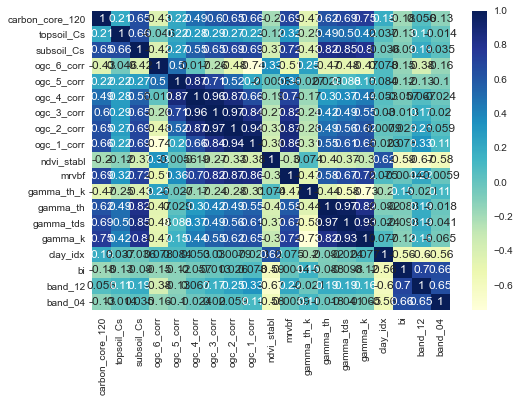

,carbon_core_120,topsoil_Cs,subsoil_Cs,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th_k,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04
0,69.448830,47.62564,51.59431,2986744.75,5948128.5,7315716,6723063.0,4328971.0,774934.625,9165166.0,2.40666,18.78576,7.82911,32.20633,0.41676,0.08336,0.10611,0.1913,0.0626
1,37.525543,47.70364,45.74450,2987925.50,5949543.5,7316986,6723848.0,4329060.5,774304.625,7845510.5,1.00162,18.14686,7.70367,32.82782,0.42452,0.14765,0.10932,0.1680,0.0726
2,79.774553,42.18747,44.35179,2985310.00,5946353.0,7314076,6721998.0,4328766.0,775644.625,7023209.5,2.91428,13.48349,10.14277,44.65314,0.75224,0.09569,0.13066,0.2290,0.0760
3,62.717927,42.33585,39.18092,2985010.75,5946065.0,7313876,6721939.5,4328865.0,775874.625,9440881.0,0.45301,14.79142,10.41632,45.73163,0.70421,0.12117,0.10291,0.1844,0.0509
4,97.171550,41.20672,43.47885,2985068.00,5946404.0,7314406,6722518.5,4329338.0,776114.625,7297059.5,3.93074,18.40495,10.74193,43.31732,0.58364,0.14412,0.13471,0.1910,0.0822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,106.114320,48.94765,87.11006,2985279.50,5952380.5,7324546,6734105.0,4339266.5,781724.625,6756138.5,6.77906,11.82228,11.89627,49.98874,1.00626,0.10346,0.10234,0.2029,0.0950
303,133.859357,46.37137,90.57382,2985540.00,5952612.0,7324686,6734116.5,4339146.0,781504.625,5958782.5,6.63950,11.63178,12.25910,51.83471,1.05393,0.12047,0.10676,0.2134,0.1001
304,155.471416,41.68763,88.78339,2983852.75,5950829.5,7323286,6733474.0,4339433.0,782644.625,6045238.5,6.93628,11.91337,11.95680,51.17888,1.00365,0.10279,0.12142,0.2007,0.0830
305,153.688069,49.07010,94.83672,2984784.25,5951632.5,7323746,6733467.5,4338961.5,781834.625,6770582.5,6.75485,16.28521,13.08905,51.70673,0.80374,0.10469,0.08906,0.1806,0.0875


In [33]:
# try the heatmap with transformed data
heatmap_df = df.drop(['carbon_core_30'], axis = 1) #', 'gamma_tds', 'gamma_k','band_12','mrvbf',], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)
dataplot = sns.heatmap(heatmap_df.corr(), cmap="YlGnBu", annot=True)
# # displaying heatmap
mp.show()

# based on heatmap, now choose highly correlated variables
correlated_df = df.drop( ['carbon_core_30'], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)
correlated_df


In [34]:
correlated_df.describe()

,carbon_core_120,topsoil_Cs,subsoil_Cs,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th_k,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04
count,307.000000,307.000000,307.000000,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,307.000000,3.070000e+02,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,88.854402,42.268289,57.660983,2.984306e+06,5.949059e+06,7.319765e+06,6.729147e+06,4.335459e+06,780088.110342,8.395448e+06,4.502212,21.570530,9.004583,37.313213,0.570730,0.123402,0.106930,0.197925,0.084552
std,38.650084,6.826481,23.128993,1.930843e+03,2.285207e+03,3.422066e+03,4.087156e+03,3.900088e+03,2953.364632,2.222653e+06,2.407957,14.561716,2.299491,10.121341,0.313469,0.029883,0.018345,0.039430,0.022313
min,22.504273,26.040660,21.310060,2.978222e+06,5.944316e+06,7.313826e+06,6.721686e+06,4.328124e+06,773624.625000,5.682858e+06,0.050200,6.450400,3.686090,16.406920,0.063490,0.048830,0.052100,0.099400,0.017800
25%,53.826593,38.014470,37.879300,2.983443e+06,5.947007e+06,7.316701e+06,6.725130e+06,4.331443e+06,777934.625000,6.705126e+06,2.142025,12.773700,7.033225,28.150650,0.286920,0.102620,0.096855,0.172400,0.072550
50%,82.309710,42.474250,50.065890,2.984540e+06,5.949448e+06,7.320606e+06,6.730862e+06,4.337364e+06,780874.625000,7.658744e+06,5.849240,16.836750,8.412350,35.281310,0.500770,0.123270,0.107170,0.197700,0.083700
75%,121.641074,46.417030,80.193300,2.985411e+06,5.950975e+06,7.322876e+06,6.732534e+06,4.338621e+06,782264.625000,9.589262e+06,6.745520,24.654685,11.357670,48.258985,0.896355,0.139700,0.119610,0.228850,0.096250
max,181.729642,65.280200,104.475810,2.988624e+06,5.953018e+06,7.325226e+06,6.735324e+06,4.340782e+06,785884.625000,1.692667e+07,6.977260,99.366230,13.283630,52.746770,1.128490,0.214430,0.167750,0.291600,0.179800


array([[<AxesSubplot:title={'center':'carbon_core_120'}>,
        <AxesSubplot:title={'center':'topsoil_Cs'}>,
        <AxesSubplot:title={'center':'subsoil_Cs'}>,
        <AxesSubplot:title={'center':'ogc_6_corr'}>],
       [<AxesSubplot:title={'center':'ogc_5_corr'}>,
        <AxesSubplot:title={'center':'ogc_4_corr'}>,
        <AxesSubplot:title={'center':'ogc_3_corr'}>,
        <AxesSubplot:title={'center':'ogc_2_corr'}>],
       [<AxesSubplot:title={'center':'ogc_1_corr'}>,
        <AxesSubplot:title={'center':'ndvi_stabl'}>,
        <AxesSubplot:title={'center':'mrvbf'}>,
        <AxesSubplot:title={'center':'gamma_th_k'}>],
       [<AxesSubplot:title={'center':'gamma_th'}>,
        <AxesSubplot:title={'center':'gamma_tds'}>,
        <AxesSubplot:title={'center':'gamma_k'}>,
        <AxesSubplot:title={'center':'clay_idx'}>],
       [<AxesSubplot:title={'center':'bi'}>,
        <AxesSubplot:title={'center':'band_12'}>,
        <AxesSubplot:title={'center':'band_04'}>, <AxesSubplo

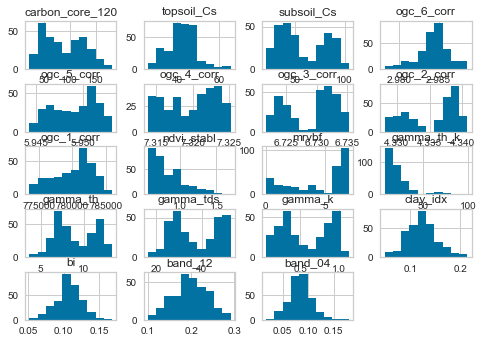

In [35]:
Core_SOC_df = correlated_df
Core_SOC_df.hist()

In [36]:
# Investigating drivers of Core_SOC

In [37]:
g = sns.regplot(x ='NDVI_mean', y =  'carbon_core_120', data = Core_SOC_df)

KeyError: 'NDVI_mean'

In [38]:
df.columns

Index(['carbon_core_30', 'carbon_core_120', 'topsoil_Cs', 'subsoil_Cs',
       'ogc_6_corr', 'ogc_5_corr', 'ogc_4_corr', 'ogc_3_corr', 'ogc_2_corr',
       'ogc_1_corr', 'ndvi_stabl', 'mrvbf', 'gamma_th_k', 'gamma_th',
       'gamma_tds', 'gamma_k', 'clay_idx', 'bi', 'band_12', 'band_04'],
      dtype='object')

In [39]:
from pycaret.regression import *

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
exp_reg = setup(df
,target='carbon_core_30'
,normalize = True 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='COOL-30-120_ML'
,ignore_features = ['carbon_core_120']
,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.5
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
 , transformation = True
# , pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_30
2,Original Data,"(307, 20)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(214, 4)"


In [40]:
compare_models()
# MORO first run  = R2 = 0.3685
# Normalise = true  R2 from 0.37 to 0.422
# Transf targ = tru R2 from 0.422 to 0.4199
# transformation tru R2 froom 0.4199 to 0.4478
# Trans targe = Fa R2 from 0.4478 to 0.4557
# Feat interaction R2 from 0.4557 to 0.4671
# ignore features - all except top 2 R2 down to 0.29
# ignore features - all except top 5 R2 up to 0.42 - better to have all features
# turn off ign feat - R2 back to 0.4671
# PCA = True         R2 = 0.4671 - no difference
# feat select thres 0.05 R2 = 0.21 - down don't use this.
# feat select thres 0.80 R2 = 0.37 - increase 
# PCA = Fal		 R2 = 0.38
# feat selec        0.50 R2 = 0.46
# Remove Multicol = Fa 	 R2 = 0.276 - decrease - don't use
# df = ALL the covariates
# MORO 120 cm = train = 0.47
# MORO 30 cm = train = 0.51
# BODO 30 cm = train = 0.21
# CHEY 30 cm = train = -0.2
# COOL 30 cm = 0.40

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,5.7525,54.9330,7.3077,0.2208,0.2330,0.2016,0.0050
br,Bayesian Ridge,5.6668,54.3510,7.2831,0.2199,0.2323,0.1987,0.0090
lasso,Lasso Regression,5.8576,55.7164,7.3606,0.2187,0.2346,0.2058,0.0060
ridge,Ridge Regression,5.6470,54.3334,7.2812,0.2183,0.2323,0.1980,0.0080
lr,Linear Regression,5.6435,54.3442,7.2818,0.2177,0.2323,0.1978,0.0790
lar,Least Angle Regression,5.6435,54.3442,7.2818,0.2177,0.2323,0.1978,0.0060
huber,Huber Regressor,5.6064,53.9164,7.2584,0.2176,0.2316,0.1958,0.0070
en,Elastic Net,6.0944,58.0755,7.5273,0.1907,0.2391,0.2142,0.0120
ada,AdaBoost Regressor,5.9749,61.2700,7.7516,0.1351,0.2445,0.2100,0.0340
lightgbm,Light Gradient Boosting Machine,6.1573,63.0451,7.8696,0.0908,0.2510,0.2158,0.0140


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [42]:
model = create_model('omp') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.3984,36.0071,6.0006,0.5864,0.1936,0.1908
1,7.6335,105.0209,10.2480,-0.0607,0.2661,0.1946
2,4.9863,36.1586,6.0132,0.2048,0.1715,0.1431
3,5.0524,42.4144,6.5126,0.3459,0.2044,0.1552
4,5.8357,56.0828,7.4888,0.3530,0.2302,0.1977
5,6.4586,68.6231,8.2839,0.1756,0.3280,0.3129
6,5.3467,60.6211,7.7860,0.2727,0.3003,0.2506
7,6.3491,58.1709,7.6270,-0.1696,0.2518,0.2424
8,5.8009,47.2646,6.8749,0.4234,0.2111,0.1964
9,4.6635,38.9670,6.2424,0.0762,0.1734,0.1321


In [43]:
tuned_model= tune_model(model, n_iter=50, optimize = 'R2')
# 300 iterations instead of 50 makes no difference

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.3063,36.1840,6.0153,0.5844,0.1892,0.1854
1,7.2400,92.3085,9.6077,0.0677,0.2449,0.1835
2,4.8107,37.3080,6.1080,0.1795,0.1795,0.1381
3,5.3721,43.3689,6.5855,0.3312,0.2059,0.1672
4,5.6327,57.3757,7.5747,0.3381,0.2378,0.1936
5,6.0250,67.5611,8.2196,0.1884,0.3263,0.3029
6,5.0866,60.1926,7.7584,0.2779,0.2959,0.2376
7,6.8743,68.5006,8.2765,-0.3773,0.2726,0.2563
8,5.1293,39.1328,6.2556,0.5226,0.1949,0.1727
9,4.6453,36.9804,6.0811,0.1233,0.1676,0.1324


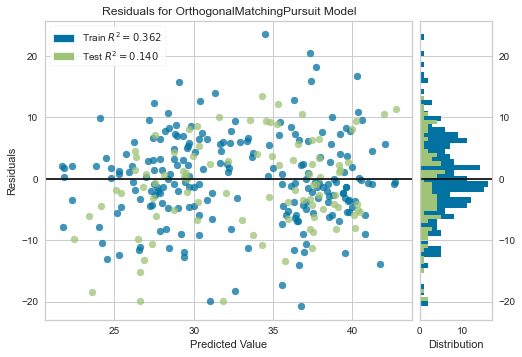

In [44]:
tuned = tuned_model
plot_model(tuned)
# train BODO - untransformed - 120 = 0.58, test = 0.44
# BODO - transformed - 120 train = 0.44, test = 0.466
# untransformed = train = 0.034, test = 0.427

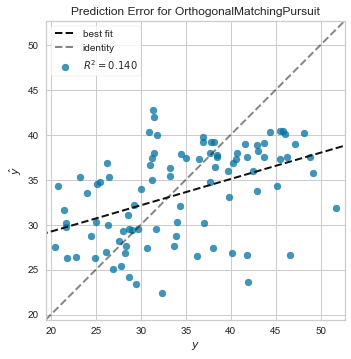

In [45]:
plot_model(tuned, plot = 'error')

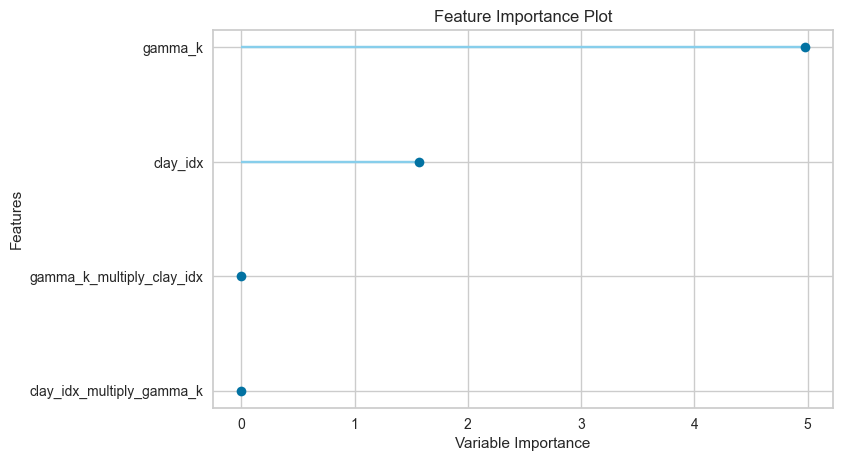

In [46]:
plot_model(tuned, plot = 'feature')

In [48]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [49]:
from pycaret.regression import *

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
exp_reg = setup(df
,target='carbon_core_120'
,normalize = True 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='COOL-30-120_ML'
,ignore_features = ['carbon_core_30']
,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.5
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
 , transformation = True
# , pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(307, 20)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(214, 3)"


In [50]:
compare_models()
# MORO first run  = R2 = 0.3685
# Normalise = true  R2 from 0.37 to 0.422
# Transf targ = tru R2 from 0.422 to 0.4199
# transformation tru R2 froom 0.4199 to 0.4478
# Trans targe = Fa R2 from 0.4478 to 0.4557
# Feat interaction R2 from 0.4557 to 0.4671
# ignore features - all except top 2 R2 down to 0.29
# ignore features - all except top 5 R2 up to 0.42 - better to have all features
# turn off ign feat - R2 back to 0.4671
# PCA = True         R2 = 0.4671 - no difference
# feat select thres 0.05 R2 = 0.21 - down don't use this.
# feat select thres 0.80 R2 = 0.37 - increase 
# PCA = Fal		 R2 = 0.38
# feat selec        0.50 R2 = 0.46
# Remove Multicol = Fa 	 R2 = 0.276 - decrease - don't use
# df = ALL the covariates
# MORO 120 cm = train = 0.47
# MORO 30 cm = train = 0.51
# BODO 30 cm = train = 0.21
# BODO 120 cm = train = 0.37
# COOL 120 cm = train = 0.50

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,20.3068,719.1364,26.1433,0.5030,0.3475,0.3054,0.0150
huber,Huber Regressor,20.3752,735.5070,26.4153,0.4974,0.3503,0.2956,0.0060
lasso,Lasso Regression,20.5486,732.7652,26.3796,0.4959,0.3486,0.3090,0.0080
br,Bayesian Ridge,20.6037,737.7432,26.4751,0.4926,0.3507,0.3083,0.0060
ridge,Ridge Regression,20.6013,737.7282,26.4795,0.4924,0.3511,0.3080,0.0070
lr,Linear Regression,20.6005,737.9207,26.4865,0.4921,0.3514,0.3078,0.0630
lar,Least Angle Regression,20.6005,737.9207,26.4865,0.4921,0.3514,0.3078,0.0060
par,Passive Aggressive Regressor,20.5845,768.3244,27.0612,0.4711,0.3519,0.2874,0.0060
lightgbm,Light Gradient Boosting Machine,21.4858,788.5591,27.5784,0.4592,0.3549,0.3122,0.0210
ada,AdaBoost Regressor,22.1695,813.8470,27.9035,0.4493,0.3648,0.3371,0.0190


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [51]:
model = create_model('omp') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.8198,362.0078,19.0265,0.7395,0.2749,0.2352
1,28.3705,1369.1528,37.0021,0.1521,0.4483,0.3544
2,22.0589,921.7066,30.3596,0.3803,0.2989,0.1881
3,19.0594,478.4041,21.8725,0.6761,0.3392,0.2908
4,23.8593,910.7007,30.1778,0.5863,0.3212,0.2951
5,19.6961,545.5748,23.3575,0.3530,0.3957,0.4171
6,21.1603,815.7093,28.5606,0.4300,0.4248,0.3970
7,21.1209,891.1119,29.8515,0.4378,0.4344,0.4298
8,20.0829,648.8523,25.4726,0.5071,0.3286,0.2993
9,11.8403,248.1440,15.7526,0.7680,0.2092,0.1474


In [52]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
# 300 iterations instead of 50 makes no difference

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.8198,362.0078,19.0265,0.7395,0.2749,0.2352
1,28.3705,1369.1528,37.0021,0.1521,0.4483,0.3544
2,22.0589,921.7066,30.3596,0.3803,0.2989,0.1881
3,19.0594,478.4041,21.8725,0.6761,0.3392,0.2908
4,23.8593,910.7007,30.1778,0.5863,0.3212,0.2951
5,19.6961,545.5748,23.3575,0.3530,0.3957,0.4171
6,21.1603,815.7093,28.5606,0.4300,0.4248,0.3970
7,21.1209,891.1119,29.8515,0.4378,0.4344,0.4298
8,20.0829,648.8523,25.4726,0.5071,0.3286,0.2993
9,11.8403,248.1440,15.7526,0.7680,0.2092,0.1474


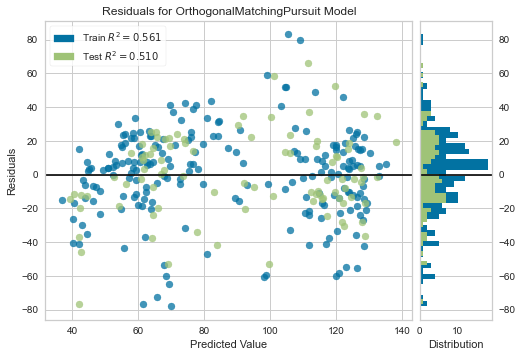

In [53]:
tuned = tuned_model
plot_model(tuned)
# train BODO - untransformed - 120 = 0.58, test = 0.44
# BODO - transformed - 120 train = 0.44, test = 0.466
# untransformed = train = 0.034, test = 0.427

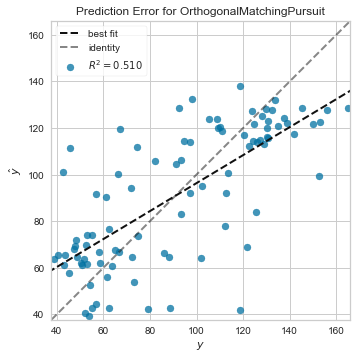

In [54]:
plot_model(tuned, plot = 'error')

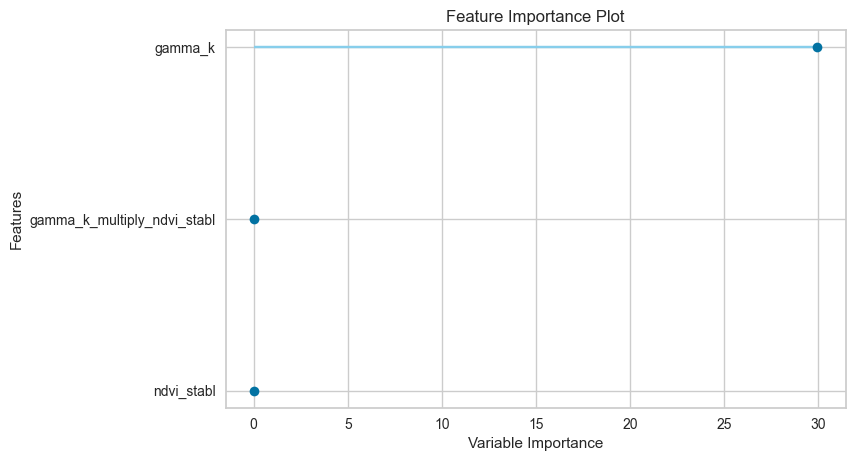

In [55]:
plot_model(tuned, plot = 'feature')

In [ ]:
# using transformed data 
# input file = transformed_df

In [61]:
from pycaret.regression import *

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
exp_reg = setup(df
,target='carbon_core_120'
,normalize = False 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='COOL-30-120_ML'
,ignore_features = ['carbon_core_30']
,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.5
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
 , transformation = True
# , pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(307, 20)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(214, 4)"


In [62]:
compare_models()
# COOL 120 cm = 0.50
# Normalise = False = 0.49

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,20.1392,717.0439,26.2325,0.4995,0.3517,0.3026,0.0060
omp,Orthogonal Matching Pursuit,20.4459,726.9635,26.3080,0.4971,0.3511,0.3085,0.0060
br,Bayesian Ridge,20.2376,720.1084,26.2685,0.4971,0.3502,0.3085,0.0060
ridge,Ridge Regression,20.2336,720.1068,26.2695,0.4970,0.3504,0.3082,0.0050
lr,Linear Regression,20.2311,720.2727,26.2731,0.4968,0.3506,0.3080,0.0630
lar,Least Angle Regression,20.2311,720.2727,26.2731,0.4968,0.3506,0.3080,0.0140
lasso,Lasso Regression,20.3478,723.7607,26.3323,0.4958,0.3508,0.3105,0.0060
ada,AdaBoost Regressor,21.8096,797.7355,27.5517,0.4467,0.3633,0.3401,0.0190
par,Passive Aggressive Regressor,21.5193,795.5484,27.6095,0.4381,0.4137,0.3302,0.0140
en,Elastic Net,22.6189,823.2692,28.2081,0.4257,0.3699,0.3509,0.0050


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [63]:
model = create_model('omp') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16.1286,376.5250,19.4043,0.7291,0.2860,0.2410
1,28.3535,1360.9845,36.8915,0.1572,0.4500,0.3568
2,22.0047,918.2693,30.3030,0.3826,0.2969,0.1875
3,19.3981,497.1864,22.2977,0.6634,0.3479,0.2971
4,24.0650,920.4605,30.3391,0.5819,0.3244,0.2996
5,19.9342,559.3884,23.6514,0.3366,0.3999,0.4230
6,21.4598,827.2844,28.7626,0.4219,0.4288,0.4026
7,21.0650,899.3233,29.9887,0.4326,0.4349,0.4271
8,20.2531,665.3751,25.7949,0.4945,0.3343,0.3034
9,11.7969,244.8379,15.6473,0.7711,0.2080,0.1466


In [64]:
tuned_model= tune_model(model, n_iter=50, optimize = 'R2')
# 300 iterations instead of 50 makes no difference

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16.9273,422.0453,20.5437,0.6963,0.3237,0.2650
1,26.2565,1202.9249,34.6832,0.2551,0.4317,0.3261
2,22.5509,908.1748,30.1359,0.3894,0.3047,0.1996
3,21.6805,637.5168,25.2491,0.5684,0.3672,0.3304
4,23.4747,859.9089,29.3242,0.6094,0.3242,0.3003
5,19.9315,646.0515,25.4175,0.2338,0.4248,0.4449
6,20.3927,752.4611,27.4310,0.4742,0.4062,0.3811
7,21.4691,956.7971,30.9321,0.3963,0.4511,0.4332
8,18.6332,556.3131,23.5863,0.5774,0.3236,0.2862
9,11.1290,206.9855,14.3870,0.8065,0.1783,0.1335


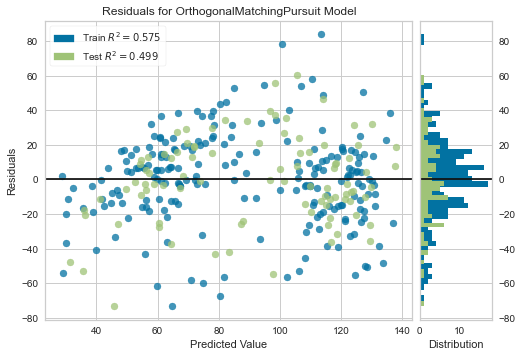

In [65]:
tuned = tuned_model
plot_model(tuned)
# train BODO - untransformed - 120 = 0.58, test = 0.44
# BODO - transformed - 120 train = 0.44, test = 0.466
# untransformed = train = 0.34, test = 0.427
# COOL - normalised = train 0.57, test = 0.49